## Import necessary libraries

In [1]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

## Define sample text

In [2]:
text = "The quick brown fox jumps over the lazy dog."

## Tokenize text using split by space

In [3]:
tokens = text.split(" ")
print("Tokens:", tokens)

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']


## Tokenize text using regular expression

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


## Perform stemming on tokens

In [5]:
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print("Stemmed Tokens:", stemmed_tokens)

Stemmed Tokens: ['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


## Perform lemmatization on tokens

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jawad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/jawad/nltk_data...


True

In [7]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [18]:
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print("lemmatized Tokens:", lemmatized_tokens)

lemmatized Tokens: ['The', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazy', 'dog']


## Remove stop words from tokens

In [19]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jawad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words("english"))
filtered_tokens = [token for token in tokens if token not in stop_words]
print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


## Perform part-of-speech tagging on tokens

In [9]:
# Averaged perceptron is a part-of-speech tagging algorithm, 
# used to assign parts of speech to each word in a sentence.
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jawad/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
tagged_tokens = pos_tag(tokens)
print("Tagged Tokens:", tagged_tokens)

Tagged Tokens: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN')]


## Embedding

In [11]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [6]:
import gensim
import gensim.downloader as api
import numpy as np

api.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [7]:
# load model
model = api.load('glove-twitter-25')

In [8]:
# Apply the model to a corpus of text
words = ["new-york", "paris", "dog", "cat", "tapas", "pizza", "science", "book",
         "maths", "theory", "night", "day", "hour", "word", "sentence", "wold", "above", "under",
        "europe", "africa", "france", "italy", "india", "happy", "sad"]
vectors = [model[word] for word in words]

In [15]:
######## Can you check the vector dimension ? ############

In [9]:
!pip install -U scikit-learn

In [4]:
import numpy as np

In [11]:
# Visualize the vectors using matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20)
vectors_2d = tsne.fit_transform(np.array(vectors))

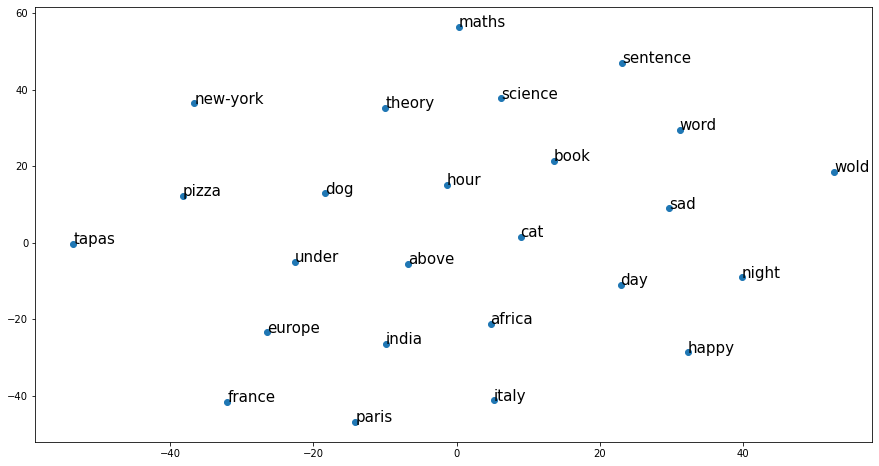

In [12]:
fig, ax = plt.subplots( figsize=(15, 8))
ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, txt in enumerate(words):
    ax.annotate(txt, (vectors_2d[:, 0][i], vectors_2d[:, 1][i]), fontsize=15)
plt.show()